Building a machine learning project to predict house prices using Python and the XGBoost Regressor algorithm.

Core Concepts:
Regression vs. Classification: Predicting a quantity or continuous number or a specific number (like a house price,salary, age,etc...) is a regression problem, whereas predicting a category or a class or discrete values (like diabetic or not diabetic, true or false, male or feamle, etc...) is a classification problem.

Supervised Learning: This project uses labeled data, meaning the model is trained on data that already includes the correct house prices so it can learn the relationship between features and the final cost.

Project Workflow
Data Collection: The project uses the Boston House Price Dataset, which includes features like crime rates, tax information, and the number of rooms in various areas.

Data Preparation: * The data is loaded into a structured table called a Pandas Data Frame.

We checks for missing values (luckily, there are none in this dataset) and performs statistical analysis (mean, standard deviation).

Data Analysis (Correlation): A Heat Map is used to visualize how different features affect house prices. For example, it shows how "LSTAT" (lower financial status of the area) is negatively correlated with price—meaning as that value goes up, house prices go down.

Splitting the Data: The data is divided into two parts: Training data (80%) to teach the model and Test data (20%) to see how well it works on information it hasn't seen before.

Model Training and Evaluation:
The Algorithm: The project uses XGBoost Regressor, an efficient algorithm based on decision trees that is highly effective for regression tasks.

Evaluating Performance: Unlike classification tasks that use "accuracy percentage," regression models are evaluated using R-squared error and Mean Absolute Error. These metrics help determine how close the model's predictions are to the actual prices.

Visualization: To confirm the model's accuracy, a scatter plot is created comparing actual prices versus predicted prices. The closer the dots are to a diagonal line, the more accurate the model.

Importing the Dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the Boston House Price Dataset

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
house_price_dataset = pd.read_csv('/content/drive/MyDrive/Data_Sets/Boston_house_price.csv')

In [9]:
house_price_dataset

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [11]:
house_price_dataset.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
# add the medv(price) column to the DataFrame
house_price_dataset['price'] = house_price_dataset['medv']

In [14]:
house_price_dataset.shape

(506, 16)

In [15]:
house_price_dataset.isnull().sum()

,0
Unnamed: 0,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0


Understanding the correlation between various features in the dataset

1.Positive Correlation

2.Negative Correlation

In [16]:
correlation = house_price_dataset.corr()

<Axes: >

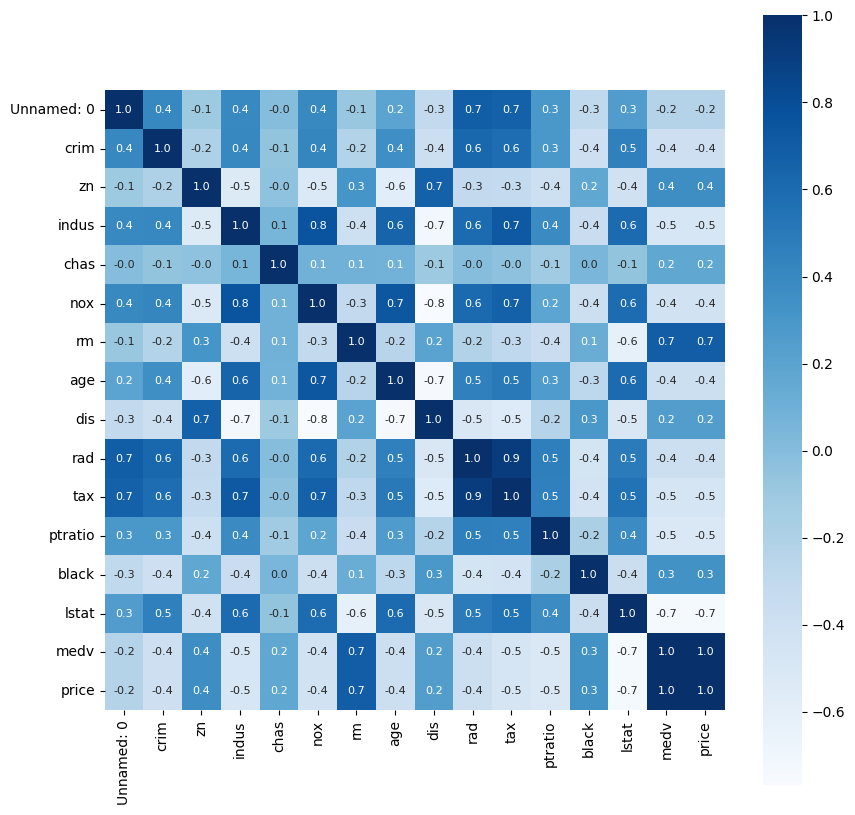

In [17]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [18]:
X = house_price_dataset.drop(['price'], axis=1)
Y = house_price_dataset['price']

In [20]:
print(X)

     Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0             1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1             2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2             3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3             4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4             5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504         505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
505         506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1   

     tax  ptratio   black  lstat  medv 

In [21]:
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64


Splitting the data into Training data and Test data

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(506, 15) (404, 15) (102, 15)


Model Training

In [24]:
model = XGBRegressor()

In [25]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluation

In [26]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [27]:
print(training_data_prediction)

[23.097149  21.001343  20.10044   34.70014   13.900978  13.498141
 22.0006    15.199779  10.900297  22.69878   13.802067   5.6003466
 29.798582  49.99992   34.89984   20.599676  23.39968   19.208017
 32.699234  19.600018  27.001295   8.398927  46.001842  21.700668
 27.100441  19.398783  19.300133  24.800356  22.597715  31.696386
 18.499365   8.699532  17.401165  23.69989   13.300694  10.501905
 12.702783  24.99917   19.699633  14.904191  24.202902  25.000137
 14.900933  16.999952  15.602941  12.700228  24.500376  15.000332
 50.000557  17.499075  21.199953  32.000717  15.600586  22.900494
 19.297997  18.70049   23.299759  37.199913  30.099922  33.101017
 21.000603  49.999504  13.399271   5.0012383 16.50052    8.4004
 28.696877  19.49904   20.599178  45.399433  39.80219   33.399803
 19.800758  33.399227  25.300512  49.999767  12.496657  17.399822
 18.599487  22.59935   50.00025   23.803068  23.298552  23.09991
 41.69951   16.100094  31.59957   36.099293   6.9990773 20.400736
 20.000332  

In [28]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9999999730832511
Mean Absolute Error :  0.0010676447707828481


Visualizing the actual Prices and predicted prices

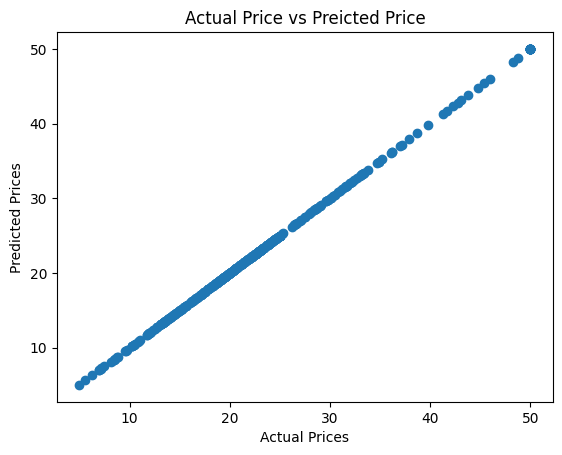

In [29]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

Prediction on Test Data

In [30]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [31]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9993948779140392
Mean Absolute Error :  0.1336241881052652


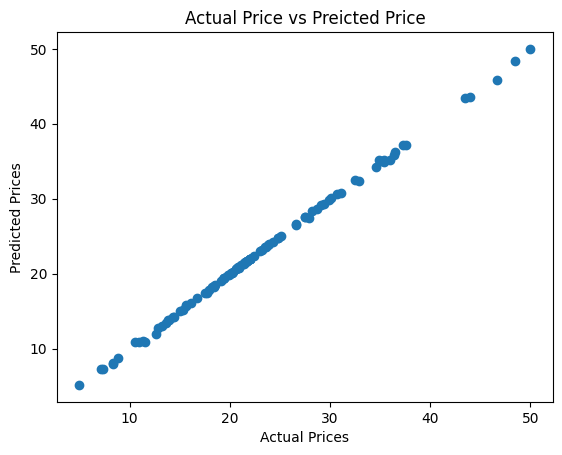

In [32]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()